In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
%matplotlib inline

In [2]:
hr_data=pd.read_excel('F:\Henry Harvin\HR - Attrition Data.xlsx')
hr_data.head()
hr_data.shape

(1470, 25)

In [3]:
hr_data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
hr_data.dtypes

Attrition                   object
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [14]:
hr_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
hr_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [69]:
min_accuracy= ((1233-237)/1233)
min_accuracy

0.8077858880778589

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

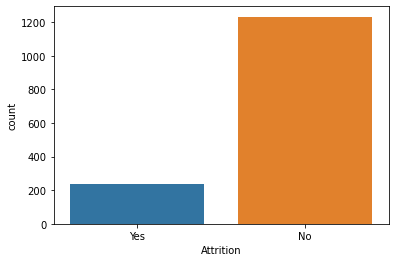

In [16]:
sns.countplot(hr_data['Attrition'])

<AxesSubplot:xlabel='Age', ylabel='count'>

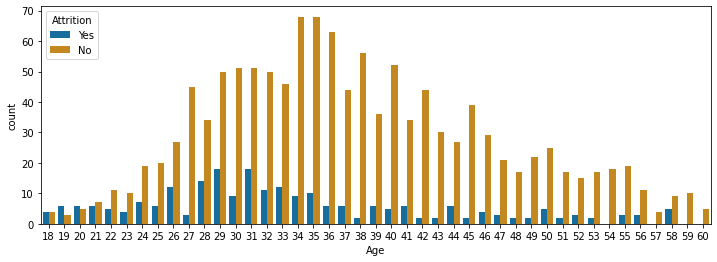

In [19]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=hr_data, palette='colorblind')

In [25]:
for column in hr_data.columns:
    if hr_data[column].dtype==object:
        print(str(column)+':'+str(hr_data[column].unique()))
        print(hr_data[column].value_counts())
        print('_____________________________________')
    

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_____________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_____________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_____________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_____________________________________
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_____________________________________
JobRole:[

In [38]:
for column in hr_data.columns:
    if hr_data[column].dtype!=object:
        print(hr_data['Age'].unique())
        print('__________________________')

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
__________________________
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
__________________________
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
__________________________
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
__________________________
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
__________________________
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
__________________________
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 

In [40]:
#Correlation
hr_data.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.004628,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.148280,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.034297,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,1.000000,-0.007157,-0.055699,0.020002,0.002297,-0.012454,-0.020185,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.025873,0.772893,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.052733,0.237639,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.040235,-0.011111,-0.031701,-0.017205,0.020002,-0.027269,-0.010238,1.000000,0.773550,-0.040490,-0.020608,-0.003280,-0.035991,-0.001520,-0.022154,-0.011985
PerformanceRating,0.001904,0.027110,-0.024539,-0.029548,-0.029071,0.002297,-0.017120,-0.014095,0.773550,1.000000,-0.031351,0.006744,0.002572,0.003435,0.034986,0.017896,0.022827


<AxesSubplot:>

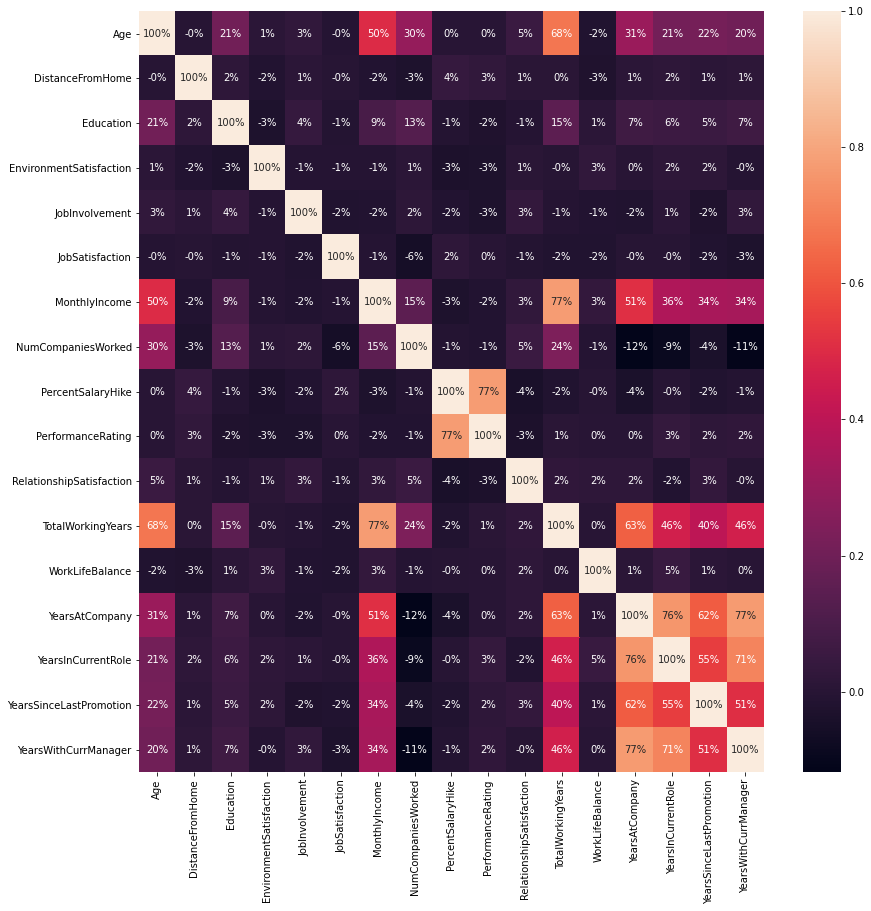

In [45]:
#visualization of correlation
plt.figure(figsize=(14,14))
sns.heatmap(hr_data.corr(),annot=True,fmt='.0%')

In [52]:
#transform data
#transform non-numerical columns to numerical columns
from sklearn.preprocessing import LabelEncoder
for column in hr_data.columns:
    if hr_data[column].dtype == object:
        #continue
        hr_data[column]=LabelEncoder().fit_transform(hr_data[column])
hr_data

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,23,2,2,0,1,1,1,0,2,...,1,0,0,0,8,0,6,4,0,5
1,0,31,1,1,7,0,1,2,1,1,...,0,12,1,3,10,2,10,7,1,7
2,1,19,2,1,1,1,4,3,1,1,...,1,4,0,1,7,2,0,0,0,0
3,0,15,1,1,2,3,1,3,0,2,...,1,0,0,2,8,2,8,7,3,0
4,0,9,2,1,1,0,3,0,1,2,...,0,1,0,3,6,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,18,1,1,22,1,3,2,1,3,...,0,6,0,2,17,2,5,2,0,3
1466,0,21,2,1,5,0,3,3,1,1,...,0,4,0,0,9,2,7,7,1,7
1467,0,9,2,1,3,2,1,1,1,3,...,1,9,1,1,6,2,6,2,0,3
1468,0,31,1,2,1,2,3,3,1,1,...,0,3,0,3,17,1,9,6,0,8


In [53]:
hr_data['Age_col']=hr_data['Age']
hr_data.drop('Age', axis=1)

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_col
0,1,2,2,0,1,1,1,0,2,7,...,0,0,0,8,0,6,4,0,5,23
1,0,1,1,7,0,1,2,1,1,6,...,12,1,3,10,2,10,7,1,7,31
2,1,2,1,1,1,4,3,1,1,2,...,4,0,1,7,2,0,0,0,0,19
3,0,1,1,2,3,1,3,0,2,6,...,0,0,2,8,2,8,7,3,0,15
4,0,2,1,1,0,3,0,1,2,2,...,1,0,3,6,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,22,1,3,2,1,3,2,...,6,0,2,17,2,5,2,0,3,18
1466,0,2,1,5,0,3,3,1,1,0,...,4,0,0,9,2,7,7,1,7,21
1467,0,2,1,3,2,1,1,1,3,4,...,9,1,1,6,2,6,2,0,3,9
1468,0,1,2,1,2,3,3,1,1,7,...,3,0,3,17,1,9,6,0,8,31


In [55]:
x=hr_data.iloc[:, 1:hr_data.shape[1]].values
y=hr_data.iloc[:, 0].values

In [56]:
#split dataset into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [57]:
#Use random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [58]:
#get accuracy of training data set
forest.score(x_train, y_train)

0.984573502722323

In [60]:
#show confusion matrix and accuracy score for model on test data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, forest.predict(x_test))
print(cm)


[[297   3]
 [ 56  12]]


In [65]:
accuracy = ((297+12)/(297+12+56+3))
print('accuracy is ')
print(accuracy)

accuracy is 
0.8396739130434783
